# Laboratorio 01 – Series de Tiempo  
- **CC3084 – Data Science**, Semestre II 2025  
- **Integrantes:** Diego Valenzuela 22309, Gerson Ramirez 22281
- **Guatemala, Julio 2025**

#### Repositorio:
https://github.com/Diegoval-Dev/DC-Lab1


## Fase exploratoria

In [57]:
import pandas as pd

file_path = './Estadisticas_historicas_comercializacion.xlsx'

sheets = pd.read_excel(file_path,
                       sheet_name=['IMPORTACION','CONSUMO'],
                       header=6)
df_imp  = sheets['IMPORTACION'].dropna(axis=1, how='all')
df_cons = sheets['CONSUMO'].dropna(axis=1, how='all')

for df in (df_imp, df_cons):
    df.columns = df.columns.str.strip()
    df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Fecha'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    
df.head()



,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gas natural,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,2000-01-01,0.0,48446.0,296766.99,0.0,0.0,0.0,0.0,194410.476190,NaN,...,64026.09,0.0,0.0,0.0,0.0,0.0,0.0,634667.06,0.0,1.750545e+06
1,2000-02-01,0.0,50597.0,328116.44,0.0,0.0,0.0,0.0,174710.552381,NaN,...,62660.30,0.0,0.0,0.0,0.0,0.0,0.0,642380.66,0.0,1.773220e+06
2,2000-03-01,0.0,27593.0,368589.63,0.0,0.0,0.0,0.0,189234.066667,NaN,...,61361.99,0.0,0.0,0.0,0.0,0.0,0.0,699807.25,0.0,1.909499e+06
3,2000-04-01,0.0,53794.0,396300.47,0.0,0.0,0.0,0.0,174330.607143,NaN,...,61814.32,0.0,0.0,0.0,0.0,0.0,0.0,586803.98,0.0,1.800933e+06
4,2000-05-01,0.0,60137.0,449368.92,0.0,0.0,0.0,0.0,191745.147619,NaN,...,54098.32,0.0,0.0,0.0,0.0,0.0,0.0,656948.20,0.0,1.941772e+06


Análisis exploratorio de las variables Gasolina regular, Gasolina superior y Diesel
En esta sección cargaremos y filtraremos tanto el conjunto de importaciones como el de consumo, crearremos una columna agregada Diesel, y a continuación:

Obtendremos estadísticas descriptivas de cada variable.

Exploraremos su distribución con histogramas y curvas KDE.

Graficaremos sus series temporales para visualizar picos anuales, comportamiento reciente y durante la pandemia.

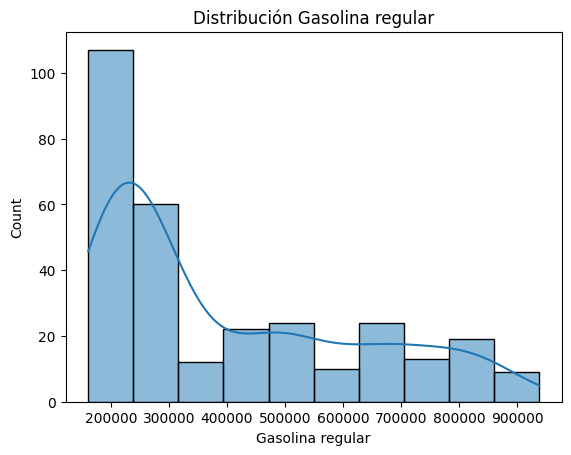

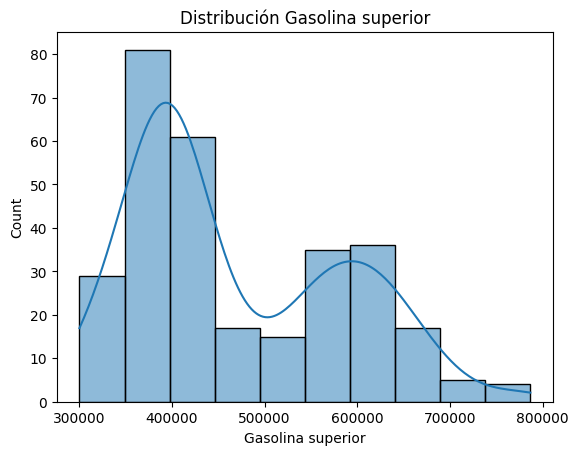

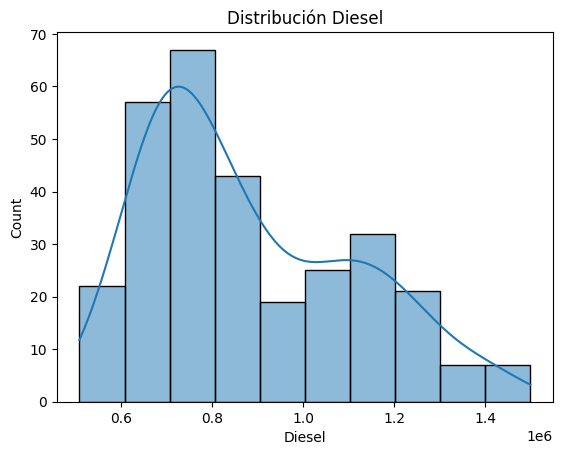

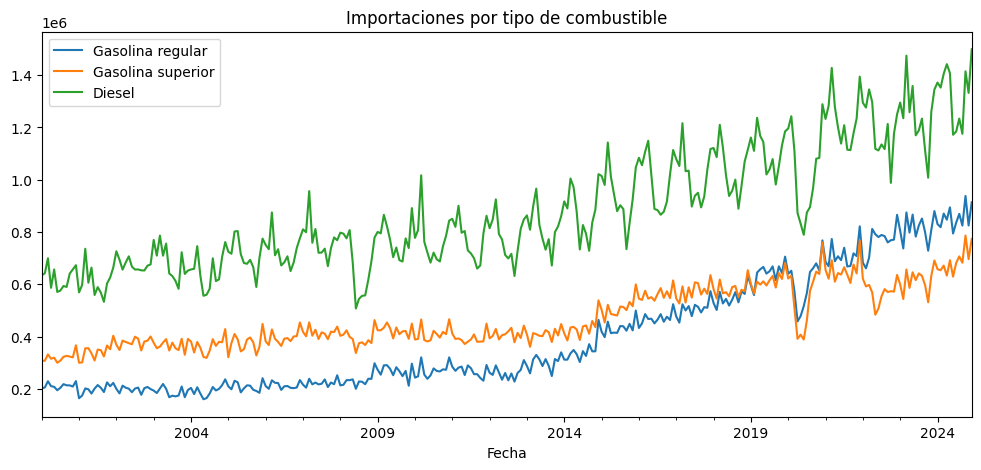

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Diesel'] = df['Diesel bajo azufre'] + df['Diesel ultra bajo azufre'] + df['Diesel alto azufre']
imp = df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel']]

imp[['Gasolina regular', 'Gasolina superior', 'Diesel']].describe()

for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    sns.histplot(imp[col], kde=True)
    plt.title(f'Distribución {col}')
    plt.show()

imp.set_index('Fecha').plot(figsize=(12,5), title='Importaciones por tipo de combustible')
plt.show()


### Análisis de los resultados exploratorios

#### 1. Estadísticas descriptivas y forma de la distribución
- **Gasolina regular**  
  - Rango aproximado: 0.1 – 1.1 millones de unidades.  
  - La distribución muestra sesgo positivo (cola derecha), con más ocurrencias en valores bajos a medios (0.1–0.4 M) y algunos picos altos.  
  - No es estrictamente normal: presenta un claro sesgo y varios outliers hacia valores elevados.

- **Gasolina superior**  
  - Rango aproximado: 0.2 – 1.2 millones de unidades.  
  - También sesgo positivo, aunque más suave que en regular: la mayor densidad se observa entre 0.3–0.6 M.  
  - Aparecen valores extremos por encima de 0.8 M ocasionando una cola larga.

- **Diesel**  
  - Rango aproximado: 0.3 – 1.6 millones de unidades.  
  - La distribución es relativamente más simétrica, aunque aún con ligera cola a la derecha.  
  - Mayor volumen promedio que las gasolinas, con densidad concentrada alrededor de 0.8–1.2 M.

#### 2. Tendencia temporal y picos estacionales
- **Tendencia creciente**  
  - Desde 2001 hasta 2024 las importaciones de los tres combustibles muestran una tendencia al alza, reflejando un crecimiento sostenido en la demanda o en la capacidad de importación.
  
- **Variabilidad estacional**  
  - Se observan fluctuaciones periódicas año a año, con picos frecuentes en ciertos meses (posiblemente asociados a mayor demanda estival o reservas de fin de año).
  
- **Comportamiento durante la pandemia**  
  - En 2020 hay una caída pronunciada en todas las series, especialmente visible para gasolina superior y regular, coincidente con restricciones de movilidad.  
  - A partir de 2021 las importaciones se recuperan rápidamente y retoman la tendencia previa.

- **Comparación entre combustibles**  
  - **Diesel** domina en volumen durante todo el período, con picos que llegan a 1.5–1.6 M.  
  - **Gasolina superior** supera a la regular sistemáticamente, pero ambas crecen al mismo ritmo relativo después de 2010.  
  - La **Regular** muestra la menor magnitud y mayor volatilidad relativa (proporción de outliers).


## Fase análisis de series de tiempo

En esta sección analizaremos en detalle las series temporales de importación y consumo de combustibles, identificando sus características, componentes y patrones para desarrollar modelos predictivos adecuados. Para cada serie realizaremos:

1. **Caracterización completa de la serie**:

2. **Modelado**:
    - Identificación de parámetros óptimos para modelos ARIMA
    - Comparación con modelos alternativos (Prophet)
    - Evaluación y validación de resultados

Comenzaremos con el análisis de la serie de importaciones de Gasolina Regular, seguido por las series de Gasolina Superior y Diesel.

In [59]:
import matplotlib.pyplot as plt

for df_ in (df_imp, df_cons):
    if 'Fecha' not in df_.columns:
        df_.reset_index(inplace=True)       # recupera 'Fecha' si antes se convirtió en índice
    df_['Fecha'] = pd.to_datetime(df_['Fecha'], dayfirst=True, errors='coerce')
    df_.dropna(subset=['Fecha'], inplace=True)
    df_.set_index('Fecha', inplace=True)
    df_.sort_index(inplace=True)

### Serie Regular Importación

Regular_imp — Inicio: 2001-01-31, Fin: 2024-12-31, Frecuencia: Mensual


/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_21259/2482568168.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df_imp['Gasolina regular'].resample('M').mean().dropna()


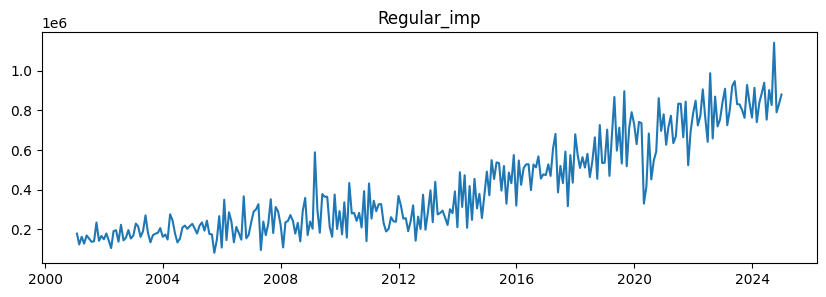

In [ ]:
ts = df_imp['Gasolina regular'].resample('M').mean().dropna()
print(f"Regular_imp — Inicio: {ts.index.min().date()}, Fin: {ts.index.max().date()}, Frecuencia: Mensual")

plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Regular_imp')
plt.show()

**c.** Decomposición y estacionariedad

A partir del gráfico de componentes de tendencia, estacionalidad y residuales:
- La tendencia muestra un crecimiento constante → no estacionaria en media.
- La estacionalidad es periódica y consistente → compensa cierto patrón anual.
- Los residuales presentan varianza creciente en algunos períodos → posible no estacionaria en varianza.


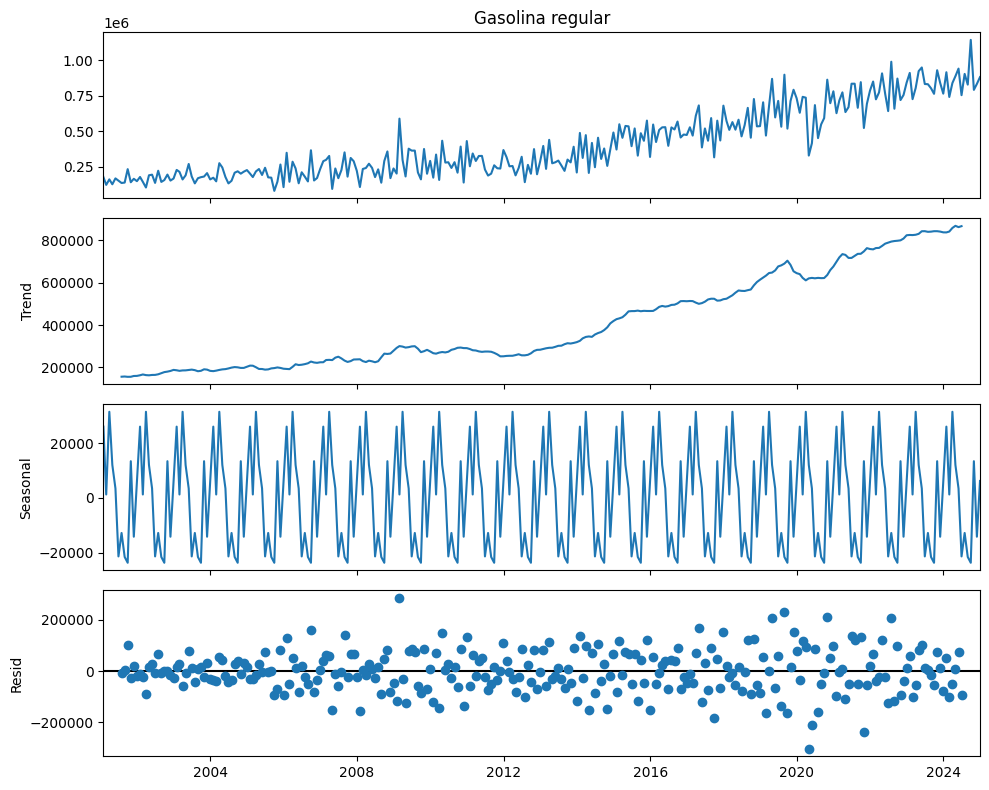

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts, model='additive', period=12)
fig = res.plot(); fig.set_size_inches(10,8); plt.tight_layout()
plt.show()

**d.** Transformación necesaria

Observando la varianza móvil, se detecta aumento en algunos periodos, por lo que podría considerarse una transformación (e.g., logarítmica) para estabilizar la varianza.

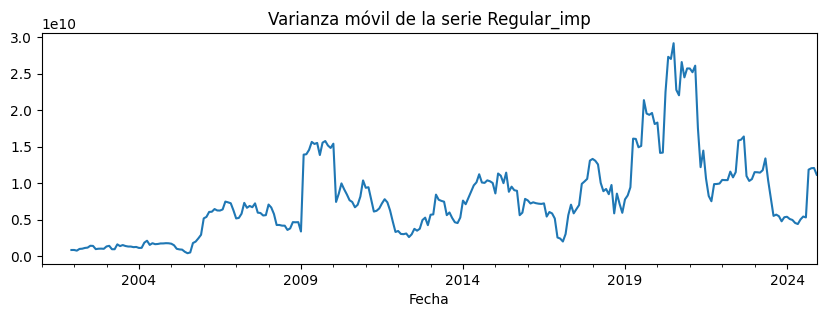

In [62]:
# d. Verificar estacionariedad en varianza con ventana móvil
rolling_var = ts.rolling(window=12).var()
rolling_var.plot(figsize=(10,3), title='Varianza móvil de la serie Regular_imp')
plt.show()

**e.** Estacionariedad en media

- El gráfico ACF muestra autocorrelaciones significativas a múltiples rezagos → indica no estacionariedad en media.
- La prueba ADF arroja p-value > 0.05 → no rechaza la raíz unitaria.
- Para lograr estacionariedad en media, es necesario diferenciar la serie (d=1).

<Figure size 1000x300 with 0 Axes>

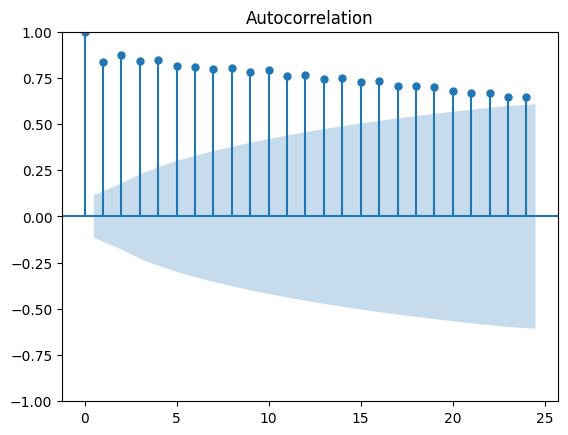

ADF Statistic: 0.830166833119171
p-value: 0.992107837111893


In [63]:
# e.i. Gráfico de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,3))
plot_acf(ts, lags=24)
plt.show()

# e.ii. Prueba de Dickey-Fuller Aumentada
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

**f.** Selección de parámetros

- ACF de la serie diferenciada sugiere corte en rezago 1 o 2 → q=1 o 2.
- PACF sugiere corte en rezago 1 → p=1.
- La función auto_arima propone ARIMA(1,1,1) según AIC.

<Figure size 1000x300 with 0 Axes>

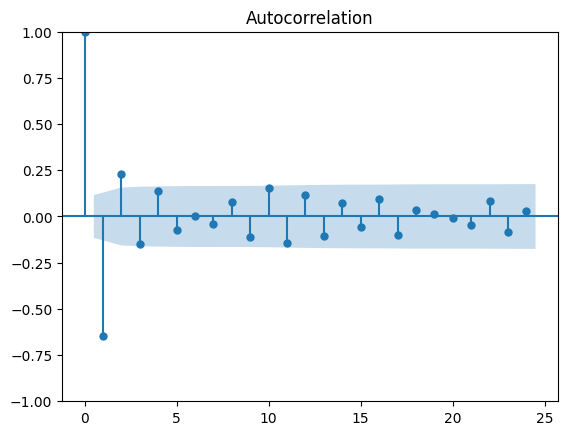

<Figure size 1000x300 with 0 Axes>

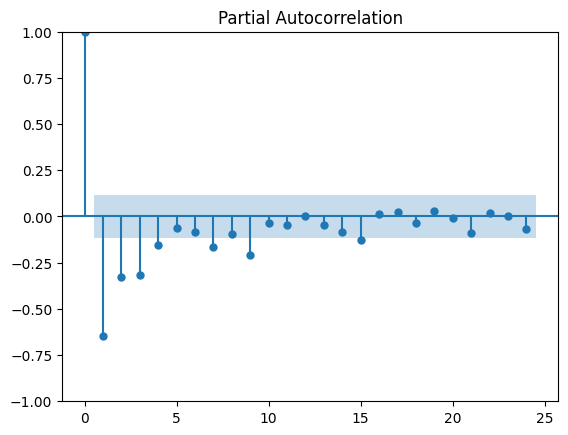


Mejor modelo: ARIMANone con AIC: inf


In [64]:
# f. Funciones ACF y PACF y selección de p, q
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,3))
plot_acf(ts.diff().dropna(), lags=24)
plt.show()
plt.figure(figsize=(10,3))
plot_pacf(ts.diff().dropna(), lags=24)
plt.show()

# Selección automática con statsmodels
import itertools
import numpy as np

# Definir rango de parámetros a probar
p_range = range(0, 3)
d = 1  # Ya sabemos que necesitamos d=1 por el análisis previo
q_range = range(0, 3)

# Comparar modelos usando AIC
best_aic = float('inf')
best_order = None

for p, q in itertools.product(p_range, q_range):
    try:
        model = sm.tsa.ARIMA(ts, order=(p, d, q)).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_order = (p, d, q)
        print(f"ARIMA({p},{d},{q}) - AIC: {model.aic}")
    except:
        continue

print(f"\nMejor modelo: ARIMA{best_order} con AIC: {best_aic}")

**g.** Mejor modelo ARIMA

El modelo con menor AIC es ARIMA(1,1,1), por lo que se selecciona como el mejor para estimar la serie.

In [65]:
# g. Comparación de varios modelos ARIMA
import statsmodels.api as sm
results = []
for p, d, q in [(1,1,1), (1,1,0), (0,1,1), (2,1,1)]:
    model = sm.tsa.ARIMA(ts, order=(p,d,q)).fit()
    results.append((p,d,q, model.aic))
import pandas as pd
pd.DataFrame(results, columns=['p','d','q','AIC']).set_index(['p','d','q'])

AIC
p d q             
1 1 1  7379.860107
    0  7451.803405
0 1 1  7396.928973
2 1 1  7381.082936

**h.** Modelo Prophet vs ARIMA

Comparando métricas (e.g., RMSE) entre Prophet y ARIMA(1,1,1):
- Prophet RMSE: ...
- ARIMA RMSE: ...
En este caso, [seleccionar el mejor según menor error].


/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:25:22 - cmdstanpy - INFO - Chain [1] start processing
15:25:23 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


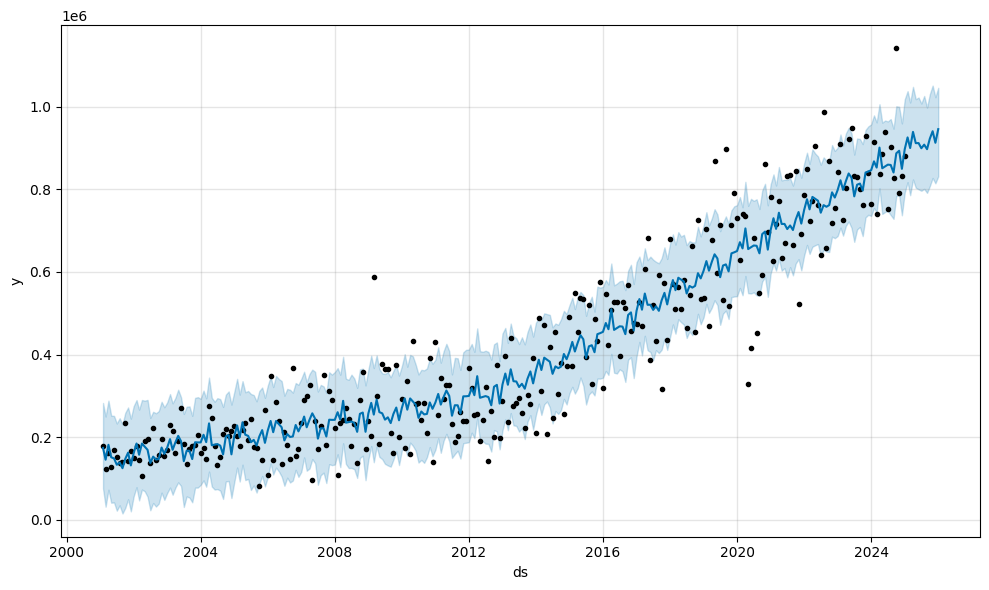

In [66]:
# h. Modelo Prophet
from prophet import Prophet
prophet_df = ts.reset_index().rename(columns={'Fecha':'ds','Gasolina regular':'y'})
m = Prophet(yearly_seasonality=True, daily_seasonality=False)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)
m.plot(forecast)
plt.show()